# Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

# Carregando o Dataset

In [3]:
# Carregar os arquivos base_climatica.csv e base_socioeconomica.csv

uploaded = files.upload()
primeiro_arquivo = list(uploaded.keys())[0]
segundo_arquivo = list(uploaded.keys())[1]

Saving base_climatica.csv to base_climatica.csv
Saving base_socioeconomica.csv to base_socioeconomica.csv


In [4]:
dfbc = pd.read_csv(primeiro_arquivo)
dfbc

,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo
0,2025-01-01,109.8,110.0,34.7,sim,45.9
1,2025-01-02,143.0,178.7,27.2,nao,34.4
2,2025-01-03,120.6,123.1,27.5,sim,77.1
3,2025-01-04,109.0,117.0,29.6,nao,29.0
4,2025-03-28,104.6,91.7,31.4,nao,45.4
...,...,...,...,...,...,...
115,2025-04-26,79.3,85.6,33.9,sim,62.9
116,2025-04-27,176.2,191.9,21.5,nao,45.2
117,2025-04-28,116.3,107.0,34.2,Sim,16.1
118,2025-04-29,176.3,157.4,33.0,nao,65.7


In [5]:
dfbs = pd.read_csv(segundo_arquivo)
dfbs

,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,8.63,0.0,não,45.7
1,2025-01-02,1000.00,200.0,não,13.8
2,2025-01-03,0.50,0.0,não,1.1
3,2025-01-04,6.40,2.0,Sim,75.8
4,2025-01-05,3.36,2.0,não,32.0
...,...,...,...,...,...
115,2025-04-26,NaN,3.0,não,78.7
116,2025-04-27,15.20,NaN,não,19.0
117,2025-04-28,NaN,NaN,sim,52.8
118,2025-04-29,14.37,2.0,Sim,74.0


# Verificando a estrutura dos dados

In [6]:
# Verificando o formato do DataFrame base_climatica (linhas, colunas)

print(f"Formato do DataFrame base_climatica: {dfbc.shape}")
print(f"Total de linhas: {dfbc.shape[0]}")
print(f"Total de colunas: {dfbc.shape[1]}\n")

print("Tipos de dados por coluna:\n")

nome_coluna_1_bc = dfbc.columns[0]
nome_coluna_2_bc = dfbc.columns[1]
nome_coluna_3_bc = dfbc.columns[2]
nome_coluna_4_bc = dfbc.columns[3]
nome_coluna_5_bc = dfbc.columns[4]
nome_coluna_6_bc = dfbc.columns[5]

print(f"coluna_1 = {nome_coluna_1_bc}")
print(f"coluna_2 = {nome_coluna_2_bc}")
print(f"coluna_3 = {nome_coluna_3_bc}")
print(f"coluna_4 = {nome_coluna_4_bc}")
print(f"coluna_5 = {nome_coluna_5_bc}")
print(f"coluna_6 = {nome_coluna_6_bc}\n")

print(dfbc.dtypes)

Formato do DataFrame base_climatica: (120, 6)
Total de linhas: 120
Total de colunas: 6

Tipos de dados por coluna:

coluna_1 = data
coluna_2 = chuvas_previstas_mm
coluna_3 = chuvas_reais_mm
coluna_4 = temperatura_media_C
coluna_5 = variacao_climatica
coluna_6 = indice_umidade_solo

data                    object
chuvas_previstas_mm    float64
chuvas_reais_mm        float64
temperatura_media_C    float64
variacao_climatica      object
indice_umidade_solo    float64
dtype: object


In [7]:
# Verificando o formato do DataFrame base_socioeconomica (linhas, colunas)

print(f"\nFormato do DataFrame base_socioeconomica: {dfbs.shape}")
print(f"Total de linhas: {dfbs.shape[0]}")
print(f"Total de colunas: {dfbs.shape[1]}\n")

print("Tipos de dados por coluna:\n")

nome_coluna_1_bs = dfbs.columns[0]
nome_coluna_2_bs = dfbs.columns[1]
nome_coluna_3_bs = dfbs.columns[2]
nome_coluna_4_bs = dfbs.columns[3]
nome_coluna_5_bs = dfbs.columns[4]

print(f"coluna_1 = {nome_coluna_1_bs}")
print(f"coluna_2 = {nome_coluna_2_bs}")
print(f"coluna_3 = {nome_coluna_3_bs}")
print(f"coluna_4 = {nome_coluna_4_bs}")
print(f"coluna_5 = {nome_coluna_5_bs}\n")

print(dfbs.dtypes)


Formato do DataFrame base_socioeconomica: (120, 5)
Total de linhas: 120
Total de colunas: 5

Tipos de dados por coluna:

coluna_1 = data
coluna_2 = volume_producao_tons
coluna_3 = incidencia_doencas
coluna_4 = acesso_agua_potavel
coluna_5 = indicador_seguranca_alimentar

data                              object
volume_producao_tons             float64
incidencia_doencas               float64
acesso_agua_potavel               object
indicador_seguranca_alimentar    float64
dtype: object


# Removendo valores ausentes

In [8]:
# Remover as linhas com valores ausentes
dfbc_limpo = dfbc.dropna()

# Mostra o número de linhas e colunas do DataFrame original
print("Formato original:", dfbc.shape)

# Mostra o número de linhas e colunas do DataFrame limpo
print("Formato após limpeza:", dfbc_limpo.shape)

Formato original: (120, 6)
Formato após limpeza: (111, 6)


In [9]:
# Remover as linhas com valores ausentes
dfbs_limpo = dfbs.dropna()

# Mostra o número de linhas e colunas do DataFrame original
print("Formato original:", dfbs.shape)

# Mostra o número de linhas e colunas do DataFrame limpo
print("Formato após limpeza:", dfbs_limpo.shape)

Formato original: (120, 5)
Formato após limpeza: (111, 5)


# Unindo os Dados

In [10]:
# Unir os dois DataFrames já limpos usando a coluna 'data'
df_completo = pd.merge(dfbc_limpo, dfbs_limpo, on='data')

# Realizando a conversão de 'sim' e não' para 1 e 0 nas colunas 'variacao_climatica' e 'acesso_agua_potavel'
df_completo[['variacao_climatica', 'acesso_agua_potavel']] = df_completo[['variacao_climatica', 'acesso_agua_potavel']].apply(lambda x: x.astype(str).str.lower().str.strip().map({'sim': 1, 'nao': 0, 'não': 0}))

# Exibir o formato final do DataFrame completo
print("Formato do DataFrame completo:", df_completo.shape)

df_completo

Formato do DataFrame completo: (103, 10)


,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,109.8,110.0,34.7,1,45.9,8.63,0.0,0,45.7
1,2025-01-02,143.0,178.7,27.2,0,34.4,1000.00,200.0,0,13.8
2,2025-01-03,120.6,123.1,27.5,1,77.1,0.50,0.0,0,1.1
3,2025-01-04,109.0,117.0,29.6,0,29.0,6.40,2.0,1,75.8
4,2025-03-28,104.6,91.7,31.4,0,45.4,8.85,1.0,1,59.7
...,...,...,...,...,...,...,...,...,...,...
98,2025-04-23,139.9,145.5,20.2,1,45.7,18.69,0.0,0,17.7
99,2025-04-24,59.5,57.5,22.8,0,82.6,14.09,1.0,1,57.2
100,2025-04-25,162.8,181.0,26.0,1,22.8,1.79,2.0,0,4.5
101,2025-04-29,176.3,157.4,33.0,0,65.7,14.37,2.0,1,74.0


# Matriz de Correlação

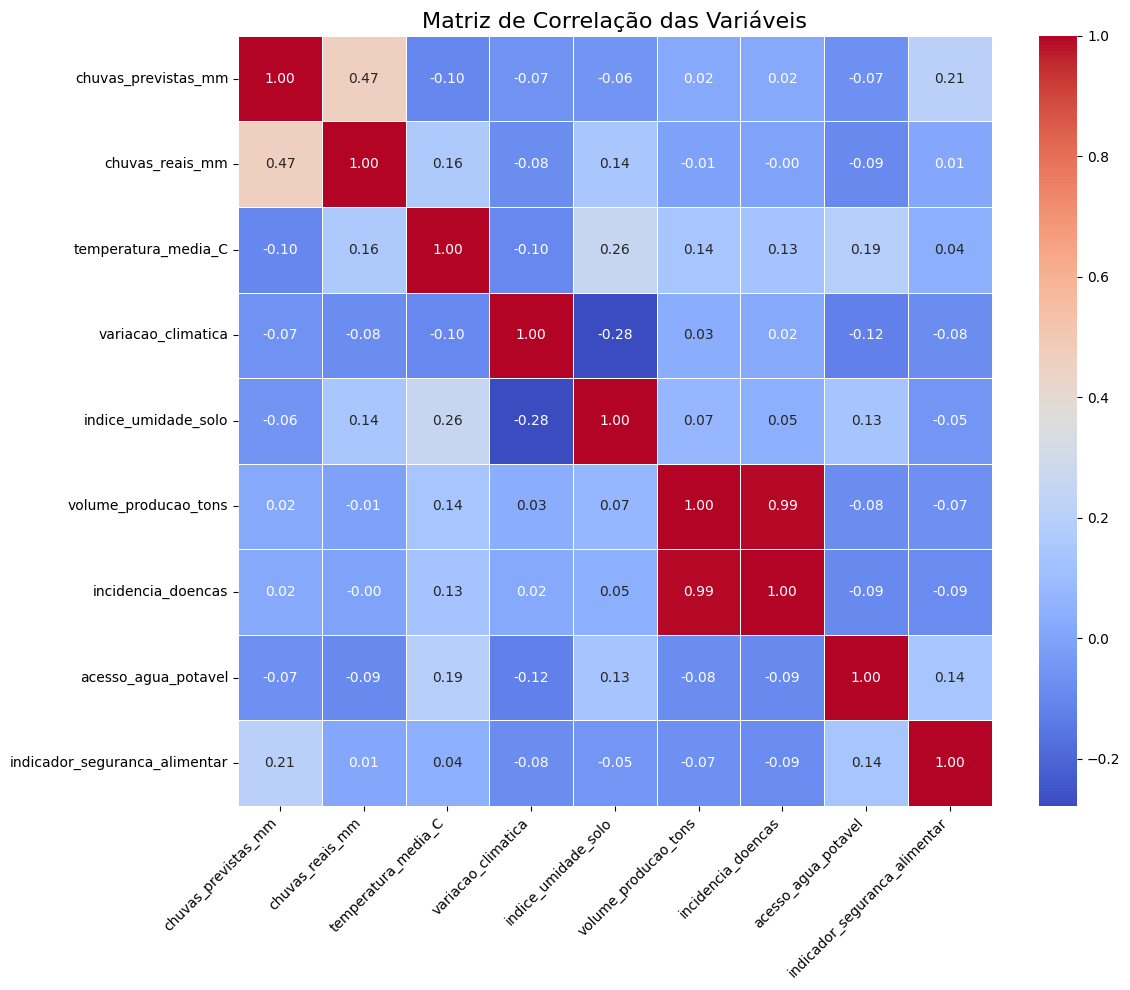

In [11]:
# Calcular a matriz de correlação
# O método .corr() calcula a relação entre todas as colunas numéricas
matriz_correlacao = df_completo.corr(numeric_only=True)

# Criar um "mapa de calor" (heatmap)

plt.figure(figsize=(12, 10)) # Define o tamanho da figura
sns.heatmap(
    matriz_correlacao,
    annot=True,          # Mostra os números de correlação no mapa
    cmap='coolwarm',     # Define o esquema de cores (quente para positivo, frio para negativo)
    fmt='.2f',           # Formata os números para terem duas casas decimais
    linewidths=0.5
)
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# Principais Correlações



*   Correlação Forte entre volume_producao_tons e incidencia_doencas



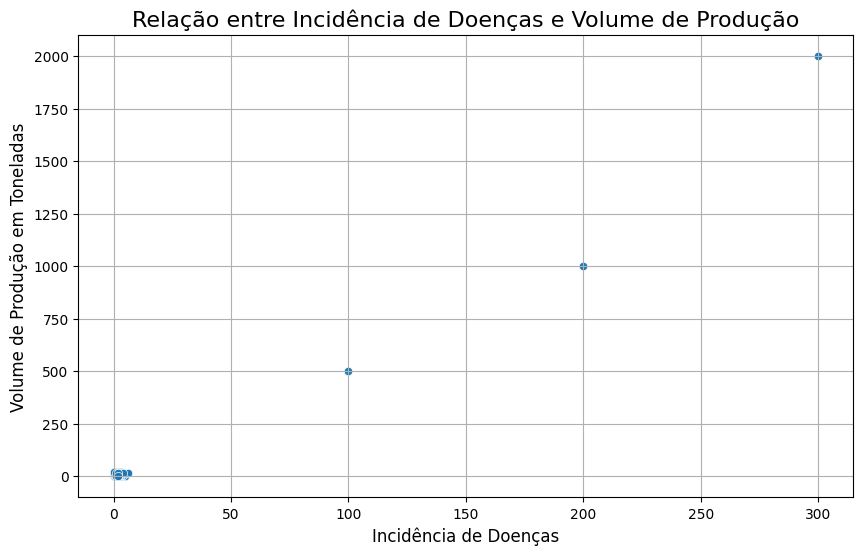

In [12]:
# Criar o gráfico de dispersão
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_completo, x='incidencia_doencas', y='volume_producao_tons')

# Adicionar Títulos e Rótulos
plt.title('Relação entre Incidência de Doenças e Volume de Produção', fontsize=16)
plt.xlabel('Incidência de Doenças', fontsize=12)
plt.ylabel('Volume de Produção em Toneladas', fontsize=12)
plt.grid(True) # Adiciona uma grade de fundo para facilitar a leitura dos valores

# Mostra o gráfico
plt.show()

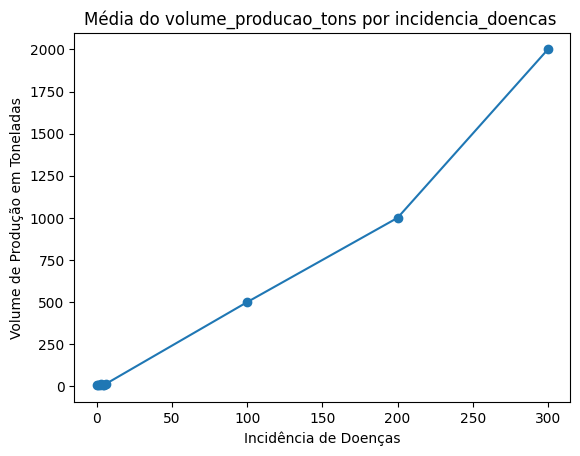

In [13]:
# Agrupando as colunas volume_producao_tons e incidencia_doencas
correlacao_volume_doencas = df_completo.groupby('incidencia_doencas')['volume_producao_tons'].mean()

# Criando um simples gráfico de linha
correlacao_volume_doencas.plot(kind='line', marker='o', linestyle='-') # O parâmetro 'kind' especifica qual tipo de gráfico queremos, nesse caso, linha (line)
plt.title('Média do volume_producao_tons por incidencia_doencas ') # Título do gráfico
plt.xlabel('Incidência de Doenças') # Rótulo do eixo x
plt.ylabel('Volume de Produção em Toneladas') # Rótulo do eixo y
plt.show()



*   Correlação Fraca entre chuvas_previstas e chuvas_reais



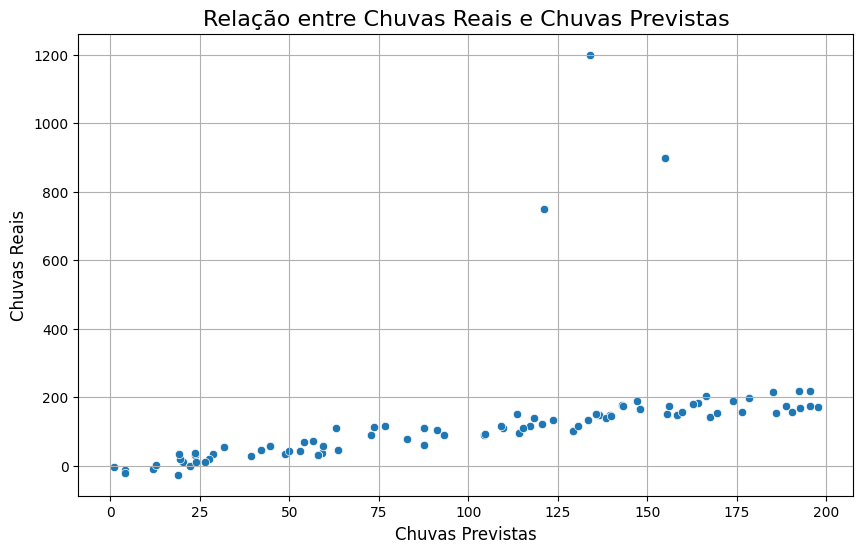

In [14]:
# Criar o gráfico de dispersão
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_completo, x='chuvas_previstas_mm', y='chuvas_reais_mm')

# Adicionar Títulos e Rótulos
plt.title('Relação entre Chuvas Reais e Chuvas Previstas', fontsize=16)
plt.xlabel('Chuvas Previstas', fontsize=12)
plt.ylabel('Chuvas Reais', fontsize=12)
plt.grid(True) # Adiciona uma grade de fundo para facilitar a leitura dos valores

# Mostra o gráfico
plt.show()

/tmp/ipython-input-15-3748449661.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_intervalo = df_completo.groupby('intervalo_chuva_prevista')['chuvas_reais_mm'].mean()


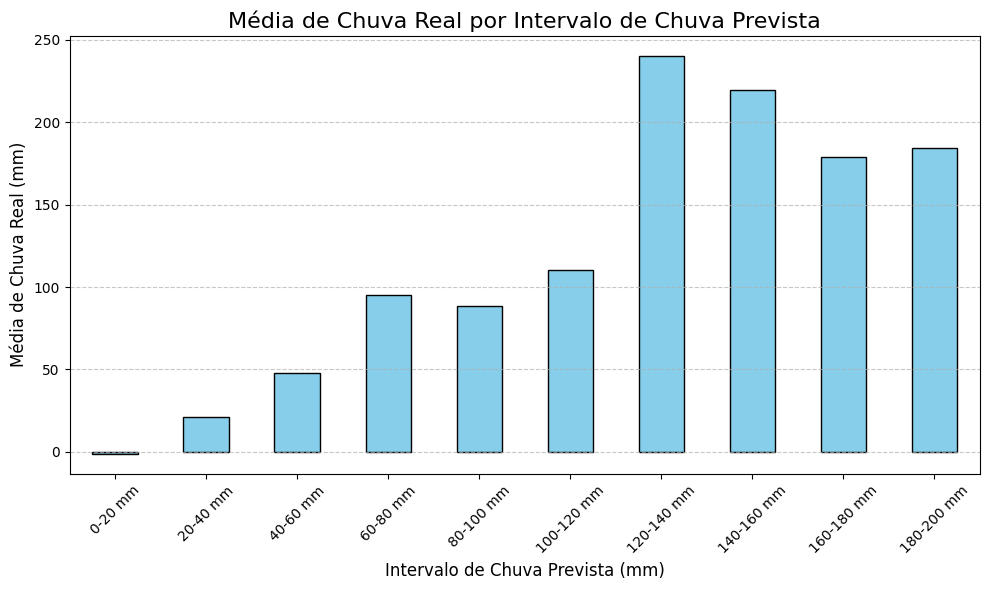

In [15]:
# Criar os intervalos (bins) para a variável contínua
# O 'range' define o início, o fim e o tamanho de cada intervalo (de 20 em 20)
bins = range(0, int(df_completo['chuvas_previstas_mm'].max()) + 20, 20)

# Cria os rótulos para cada intervalo (ex: '0-20 mm')
labels = [f'{i}-{i+20} mm' for i in bins[:-1]]

# A função pd.cut classifica cada valor de 'chuvas_previstas_mm' em um dos intervalos
df_completo['intervalo_chuva_prevista'] = pd.cut(df_completo['chuvas_previstas_mm'], bins=bins, labels=labels, right=False)

# Agrupar pelos novos intervalos e calcular a média
media_por_intervalo = df_completo.groupby('intervalo_chuva_prevista')['chuvas_reais_mm'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_intervalo.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionar Títulos e Rótulos
plt.title('Média de Chuva Real por Intervalo de Chuva Prevista', fontsize=16)
plt.xlabel('Intervalo de Chuva Prevista (mm)', fontsize=12)
plt.ylabel('Média de Chuva Real (mm)', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo X para não se sobreporem
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para garantir que tudo caiba na imagem



*   Correlação Fraca entre indice_umidade_solo e acesso_agua_potavel



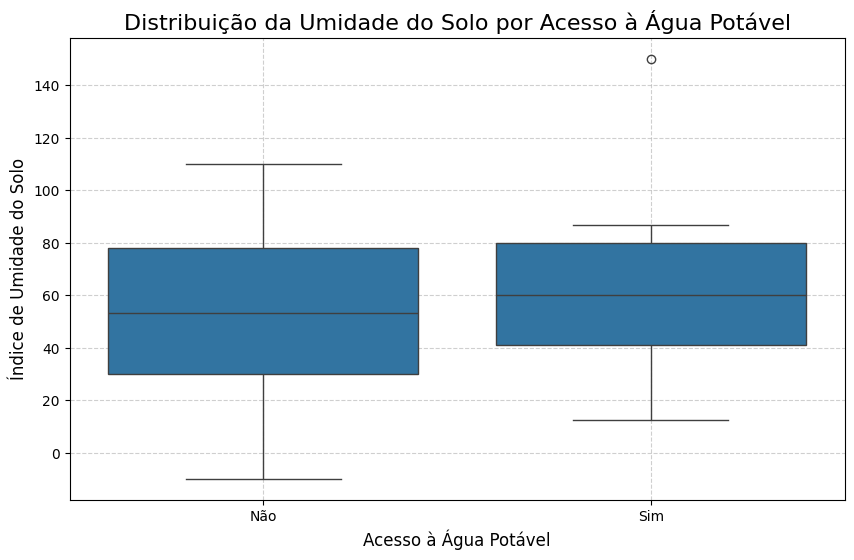

In [34]:
# Criar a figura para o Box Plot
plt.figure(figsize=(10, 6))

# A função principal do Seaborn para criar o Box Plot
# 'data': especifica o DataFrame a ser usado
# 'x': a coluna categórica para o eixo horizontal
# 'y': a coluna numérica cuja distribuição será mostrada no eixo vertical
sns.boxplot(data=df_completo, x='acesso_agua_potavel', y='indice_umidade_solo')

# 5. Adicionar Títulos e Rótulos claros
# Usamos .xticks() para renomear os valores 0 e 1 para 'Não' e 'Sim'
plt.xticks([0, 1], ['Não', 'Sim'])
plt.title('Distribuição da Umidade do Solo por Acesso à Água Potável', fontsize=16)
plt.xlabel('Acesso à Água Potável', fontsize=12)
plt.ylabel('Índice de Umidade do Solo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

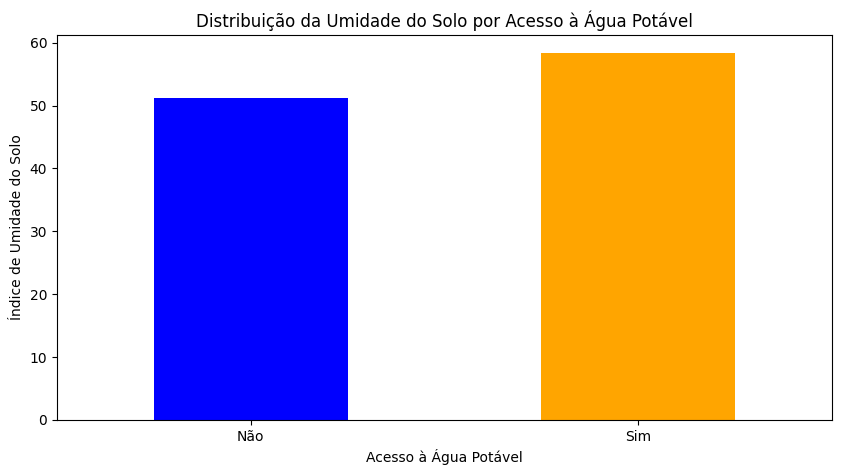

In [35]:
correlacao_agua_solo = df_completo.groupby('acesso_agua_potavel')['indice_umidade_solo'].mean()
correlacao_agua_solo.plot(
    kind='bar',
    figsize=(10, 5),  # Tamanho da figura
    color= ['blue', 'orange'],  # Cor da linha
)
plt.xticks([0, 1], ['Não', 'Sim'], rotation= 0)
plt.title('Distribuição da Umidade do Solo por Acesso à Água Potável')
plt.xlabel('Acesso à Água Potável')
plt.ylabel('Índice de Umidade do Solo')
plt.show()



*   Coreelação Fraca entre indice_umidade_solo e variacao_climatica.



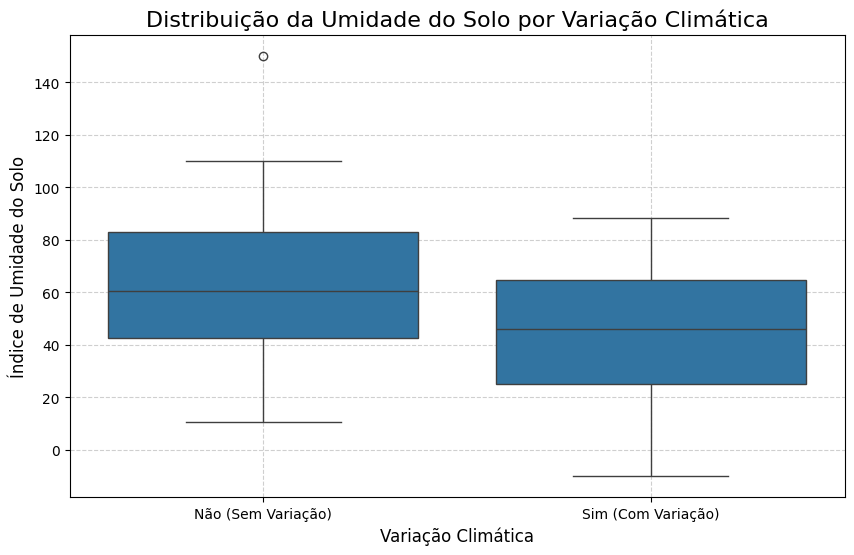

In [38]:
# Criar a figura para o Box Plot
plt.figure(figsize=(10, 6))

# A função principal do Seaborn para criar o Box Plot
# 'data': especifica o DataFrame a ser usado
# 'x': a coluna categórica para o eixo horizontal
# 'y': a coluna numérica cuja distribuição será mostrada no eixo vertical
sns.boxplot(data=df_completo, x='variacao_climatica', y='indice_umidade_solo')

# 5. Adicionar Títulos e Rótulos claros
# Usamos .xticks() para renomear os valores 0 e 1 para 'Não' e 'Sim'
plt.xticks([0, 1], ['Não (Sem Variação)', 'Sim (Com Variação)'])
plt.title('Distribuição da Umidade do Solo por Variação Climática', fontsize=16)
plt.xlabel('Variação Climática', fontsize=12)
plt.ylabel('Índice de Umidade do Solo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

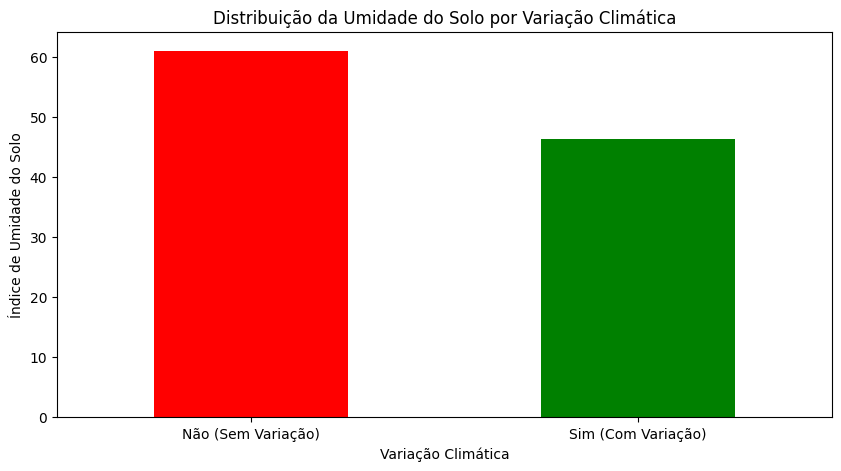

In [39]:
correlacao_variacao_solo = df_completo.groupby('variacao_climatica')['indice_umidade_solo'].mean()
correlacao_variacao_solo.plot(
    kind='bar',
    figsize=(10, 5),  # Tamanho da figura
    color= ['red', 'green'],  # Cor da linha
)
plt.xticks([0, 1], ['Não (Sem Variação)', 'Sim (Com Variação)'], rotation= 0)
plt.title('Distribuição da Umidade do Solo por Variação Climática')
plt.xlabel('Variação Climática')
plt.ylabel('Índice de Umidade do Solo')
plt.show()